In [144]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import category_encoders as ce 
from scipy.stats import randint
import matplotlib.pyplot as plot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Reading the train and test files

In [145]:
Train_Claim=pd.read_csv(r"C:\Users\91831\Desktop\CapStone_NISCHAL.B.S_4938_Solution\CapStone Train\Train_Claim.csv") 
Train_Demographics=pd.read_csv(r"C:\Users\91831\Desktop\CapStone_NISCHAL.B.S_4938_Solution\CapStone Train\Train_Demographics.csv")
Train_Policy=pd.read_csv(r"C:\Users\91831\Desktop\CapStone_NISCHAL.B.S_4938_Solution\CapStone Train\Train_Policy.csv")
Train_Vehicle=pd.read_csv(r"C:\Users\91831\Desktop\CapStone_NISCHAL.B.S_4938_Solution\CapStone Train\Train_Vehicle.csv")
Target=pd.read_csv(r"C:\Users\91831\Desktop\CapStone_NISCHAL.B.S_4938_Solution\CapStone Train\Traindata_with_Target.csv")

In [146]:
Test_Claim=pd.read_csv(r"C:\Users\91831\Desktop\CapStone_NISCHAL.B.S_4938_Solution\CapStone Test\Test_Claim.csv") 
Test_Demographics=pd.read_csv(r"C:\Users\91831\Desktop\CapStone_NISCHAL.B.S_4938_Solution\CapStone Test\Test_Demographics.csv")
Test_Policy=pd.read_csv(r"C:\Users\91831\Desktop\CapStone_NISCHAL.B.S_4938_Solution\CapStone Test\Test_Policy.csv")
Test_Vehicle=pd.read_csv(r"C:\Users\91831\Desktop\CapStone_NISCHAL.B.S_4938_Solution\CapStone Test\Test_Vehicle.csv")

# Merging the datasets using the customer ID as the criteria to match the suffled rows

In [147]:
result = pd.merge(Train_Claim, Train_Demographics, on="CustomerID")
result_ = pd.merge(Test_Claim,Test_Demographics , on="CustomerID")

In [148]:
Train_data = pd.merge(result,Train_Policy, on="CustomerID")
Test_data = pd.merge(result_,Test_Policy, on="CustomerID")

In [149]:
Train_data = pd.merge(Train_data,Target, on="CustomerID")

In [150]:
Train_data.shape

(28836, 38)

In [151]:
Test_data.shape

(8912, 37)

# Feature Engineering Making New column "Vehicale Model"

In [152]:
VehicleModel=Train_Vehicle.query("VehicleAttribute == 'VehicleModel'")
VehicleModel = VehicleModel.rename(columns = {'VehicleAttributeDetails':'VehicleModel'})
VehicleModel.drop(['VehicleAttribute'], axis=1 ,inplace=True)

In [153]:
Train_data = pd.merge(Train_data,VehicleModel, on="CustomerID")

In [154]:
VehicleModel_=Test_Vehicle.query("VehicleAttribute == 'VehicleModel'")
VehicleModel_= VehicleModel_.rename(columns = {'VehicleAttributeDetails':'VehicleModel'})
VehicleModel_.drop(['VehicleAttribute'], axis=1 ,inplace=True)

In [155]:
Test_data = pd.merge(Test_data,VehicleModel_, on="CustomerID")

In [156]:
VehicleYOM=Train_Vehicle.query("VehicleAttribute == 'VehicleYOM'")
VehicleYOM = VehicleYOM.rename(columns = {'VehicleAttributeDetails':'VehicleYOM'})
VehicleYOM.drop(['VehicleAttribute'], axis=1 ,inplace=True)

In [157]:
Train_data = pd.merge(Train_data,VehicleYOM, on="CustomerID")

In [158]:
VehicleYOM_=Test_Vehicle.query("VehicleAttribute == 'VehicleYOM'")
VehicleYOM_ = VehicleYOM_.rename(columns = {'VehicleAttributeDetails':'VehicleYOM'})
VehicleYOM_.drop(['VehicleAttribute'], axis=1 ,inplace=True)

In [159]:
Test_data = pd.merge(Test_data,VehicleYOM_, on="CustomerID")

In [160]:
VehicleID=Train_Vehicle.query("VehicleAttribute == 'VehicleID'")
VehicleID = VehicleID.rename(columns = {'VehicleAttributeDetails':'VehicleID'})
VehicleID.drop(['VehicleAttribute'], axis=1 ,inplace=True)
Train_data = pd.merge(Train_data,VehicleID, on="CustomerID")

In [161]:
VehicleID_=Test_Vehicle.query("VehicleAttribute == 'VehicleID'")
VehicleID_ = VehicleID_.rename(columns = {'VehicleAttributeDetails':'VehicleID'})
VehicleID_.drop(['VehicleAttribute'], axis=1 ,inplace=True)
Test_data = pd.merge(Test_data,VehicleID_, on="CustomerID")

In [162]:
cust=Train_data['CustomerID']
cust_=Test_data['CustomerID']

In [163]:
Test_data.shape

(8912, 40)

# The below columns will make the model bias

In [164]:
Train_data.drop(['CustomerID','IncidentAddress', 'DateOfIncident' ,'InsuredZipCode' ,  'Country', 'InsurancePolicyNumber', 'InsuredEducationLevel', 'InsuredRelationship','VehicleID'],axis=1,inplace=True)
Test_data.drop(['CustomerID','IncidentAddress', 'DateOfIncident' ,'InsuredZipCode' ,  'Country', 'InsurancePolicyNumber', 'InsuredEducationLevel', 'InsuredRelationship','VehicleID'],axis=1,inplace=True) 

In [165]:
Train_data.shape

(28836, 32)

# -----------------------------------------------------------------------------------------------------------

# Categorical columns

In [166]:
Cat=Train_data.select_dtypes(exclude=['int64'])
Cat_=Test_data.select_dtypes(exclude=['int64'])

In [167]:
Cat_.columns

Index(['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentCity',
       'PropertyDamage', 'Witnesses', 'PoliceReport', 'AmountOfTotalClaim',
       'InsuredGender', 'InsuredOccupation', 'InsuredHobbies',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'PolicyAnnualPremium', 'VehicleModel',
       'VehicleYOM'],
      dtype='object')

# TypeOfIncident

In [168]:
TypeOfIncident=Cat['TypeOfIncident']
TypeOfIncident.unique()

array(['Multi-vehicle Collision', 'Single Vehicle Collision',
       'Parked Car', 'Vehicle Theft'], dtype=object)

In [169]:
TypeOfIncident=pd.get_dummies(TypeOfIncident)

In [170]:
Cat=pd.concat([Cat,TypeOfIncident], axis="columns",join="inner")
Cat.drop(['TypeOfIncident'],axis=1,inplace=True) 

In [171]:
TypeOfIncident_=Cat_['TypeOfIncident']
TypeOfIncident_.unique()

array(['Multi-vehicle Collision', 'Single Vehicle Collision',
       'Vehicle Theft', 'Parked Car'], dtype=object)

In [172]:
TypeOfIncident_=pd.get_dummies(TypeOfIncident_)

In [173]:
Cat_=pd.concat([Cat_,TypeOfIncident_], axis="columns",join="inner")
Cat_.drop(['TypeOfIncident'],axis=1,inplace=True)

# SeverityOfIncident

In [174]:
SeverityOfIncident=Cat['SeverityOfIncident']
SeverityOfIncident.unique()

array(['Total Loss', 'Minor Damage', 'Major Damage', 'Trivial Damage'],
      dtype=object)

In [175]:
SeverityOfIncident=pd.get_dummies(SeverityOfIncident)

In [176]:
Cat.drop(['SeverityOfIncident'],axis=1,inplace=True)

In [177]:
Cat=pd.concat([Cat,TypeOfIncident], axis="columns",join="inner")

In [178]:
SeverityOfIncident_=Cat_['SeverityOfIncident']
SeverityOfIncident_.unique()

array(['Minor Damage', 'Trivial Damage', 'Major Damage', 'Total Loss'],
      dtype=object)

In [179]:
SeverityOfIncident_=pd.get_dummies(SeverityOfIncident_)

In [180]:
Cat_.drop(['SeverityOfIncident'],axis=1,inplace=True)

In [181]:
Cat_=pd.concat([Cat_,TypeOfIncident_], axis="columns",join="inner")

# AuthoritiesContacted

In [182]:
AuthoritiesContacted=Cat['AuthoritiesContacted']

In [183]:
AuthoritiesContacted=pd.DataFrame(AuthoritiesContacted)

In [184]:
(AuthoritiesContacted=='None').sum()

AuthoritiesContacted    2692
dtype: int64

In [185]:
AuthoritiesContacted['AuthoritiesContacted'] = AuthoritiesContacted['AuthoritiesContacted'].replace(to_replace='None', value='Police')

In [186]:
AuthoritiesContacted.AuthoritiesContacted.unique()

array(['Police', 'Other', 'Fire', 'Ambulance'], dtype=object)

In [187]:
AuthoritiesContacted=pd.get_dummies(AuthoritiesContacted)
Cat.drop(['AuthoritiesContacted'],axis=1,inplace=True)
Cat=pd.concat([Cat,AuthoritiesContacted], axis="columns",join="inner")

In [188]:
AuthoritiesContacted_=Cat_['AuthoritiesContacted']
AuthoritiesContacted_=pd.DataFrame(AuthoritiesContacted_)

In [189]:
(AuthoritiesContacted_=='None').sum()

AuthoritiesContacted    947
dtype: int64

In [190]:
AuthoritiesContacted_['AuthoritiesContacted'] = AuthoritiesContacted_['AuthoritiesContacted'].replace(to_replace='None', value='Police')

In [191]:
AuthoritiesContacted_.AuthoritiesContacted.unique()

array(['Ambulance', 'Fire', 'Police', 'Other'], dtype=object)

In [192]:
AuthoritiesContacted_=pd.get_dummies(AuthoritiesContacted_)
Cat_.drop(['AuthoritiesContacted'],axis=1,inplace=True)
Cat_=pd.concat([Cat_,AuthoritiesContacted_], axis="columns",join="inner")

# TypeOfCollission

In [193]:
TypeOfCollission=Cat['TypeOfCollission']

In [194]:
TypeOfCollission=pd.DataFrame(TypeOfCollission)

In [195]:
(TypeOfCollission=='?').sum()

TypeOfCollission    5162
dtype: int64

In [196]:
TypeOfCollission.value_counts()

TypeOfCollission
Rear Collision      8561
Side Collision      7867
Front Collision     7246
?                   5162
dtype: int64

In [197]:
TypeOfCollission['TypeOfCollission'] = TypeOfCollission['TypeOfCollission'].replace(to_replace='?', value='Rear Collision')

In [198]:
TypeOfCollission.TypeOfCollission.unique()

array(['Side Collision', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [199]:
TypeOfCollission=pd.get_dummies(TypeOfCollission)
Cat.drop(['TypeOfCollission'],axis=1,inplace=True)
Cat=pd.concat([Cat,TypeOfCollission], axis="columns",join="inner")

In [200]:
TypeOfCollission_=Cat_['TypeOfCollission']
TypeOfCollission_=pd.DataFrame(TypeOfCollission_)
TypeOfCollission_['TypeOfCollission'] = TypeOfCollission_['TypeOfCollission'].replace(to_replace='?', value='Rear Collision')

In [201]:
TypeOfCollission_.TypeOfCollission.unique()

array(['Front Collision', 'Rear Collision', 'Side Collision'],
      dtype=object)

In [202]:
TypeOfCollission_=pd.get_dummies(TypeOfCollission_)
Cat_.drop(['TypeOfCollission'],axis=1,inplace=True)
Cat_=pd.concat([Cat_,TypeOfCollission_], axis="columns",join="inner")

# IncidentState

In [203]:
IncidentState=Cat['IncidentState']
IncidentState=pd.DataFrame(IncidentState)
IncidentState.IncidentState.unique()

array(['State7', 'State8', 'State9', 'State5', 'State6', 'State4',
       'State3'], dtype=object)

In [204]:
IncidentState=pd.get_dummies(IncidentState)
Cat.drop(['IncidentState'],axis=1,inplace=True)
Cat=pd.concat([Cat,IncidentState], axis="columns",join="inner")

In [205]:
IncidentState_=Cat_['IncidentState']
IncidentState_=pd.DataFrame(IncidentState_)
IncidentState_.IncidentState.unique()

array(['State5', 'State9', 'State7', 'State8', 'State3', 'State4',
       'State6'], dtype=object)

In [206]:
IncidentState_=pd.get_dummies(IncidentState_)
Cat_.drop(['IncidentState'],axis=1,inplace=True)
Cat_=pd.concat([Cat_,IncidentState_], axis="columns",join="inner")

# IncidentCity

In [207]:
IncidentCity=Cat['IncidentCity']
IncidentCity=pd.DataFrame(IncidentCity)
IncidentCity.IncidentCity.unique()

array(['City1', 'City5', 'City6', 'City4', 'City3', 'City2', 'City7'],
      dtype=object)

In [208]:
IncidentCity=pd.get_dummies(IncidentCity)
Cat.drop(['IncidentCity'],axis=1,inplace=True)
Cat=pd.concat([Cat,IncidentCity], axis="columns",join="inner")

In [209]:
IncidentCity_=Cat_['IncidentCity']
IncidentCity_=pd.DataFrame(IncidentCity_)
IncidentCity_.IncidentCity.unique()

array(['City2', 'City5', 'City4', 'City1', 'City3', 'City7', 'City6'],
      dtype=object)

In [210]:
IncidentCity_=pd.get_dummies(IncidentCity_)
Cat_.drop(['IncidentCity'],axis=1,inplace=True)
Cat_=pd.concat([Cat_,IncidentCity_], axis="columns",join="inner")

# PropertyDamage

In [211]:
PropertyDamage=Cat['PropertyDamage']
PropertyDamage=pd.DataFrame(PropertyDamage)
PropertyDamage.PropertyDamage.unique()

array(['?', 'YES', 'NO'], dtype=object)

In [212]:
PropertyDamage.value_counts()

PropertyDamage
?                 10459
NO                 9687
YES                8690
dtype: int64

In [213]:
PropertyDamage['PropertyDamage'] = PropertyDamage['PropertyDamage'].replace(to_replace='?', value='NO')

In [214]:
PropertyDamage=pd.get_dummies(PropertyDamage)
Cat.drop(['PropertyDamage'],axis=1,inplace=True)
Cat=pd.concat([Cat,PropertyDamage], axis="columns",join="inner")

In [215]:
PropertyDamage_=Cat_['PropertyDamage']
PropertyDamage_=pd.DataFrame(PropertyDamage_)
PropertyDamage_.PropertyDamage.unique()

array(['NO', '?', 'YES'], dtype=object)

In [216]:
PropertyDamage_.value_counts()

PropertyDamage
?                 3199
NO                3039
YES               2674
dtype: int64

In [217]:
PropertyDamage_['PropertyDamage'] = PropertyDamage_['PropertyDamage'].replace(to_replace='?', value='NO')

In [218]:
PropertyDamage_=pd.get_dummies(PropertyDamage_)
Cat_.drop(['PropertyDamage'],axis=1,inplace=True)
Cat_=pd.concat([Cat_,PropertyDamage_], axis="columns",join="inner")

# Witnesses

In [219]:
Witnesses=Cat['Witnesses']
Witnesses=pd.DataFrame(Witnesses)
Witnesses.Witnesses.unique()

array(['0', '1', '3', '2', 'MISSINGVALUE'], dtype=object)

In [220]:
Witnesses.value_counts()

Witnesses   
2               8449
1               8345
0               6128
3               5868
MISSINGVALUE      46
dtype: int64

In [221]:
Witnesses['Witnesses'] = Witnesses['Witnesses'].replace(to_replace='MISSINGVALUE', value='0')

In [222]:
Witnesses['Witnesses'] = Witnesses['Witnesses'].replace(to_replace='0', value='wit_0')
Witnesses['Witnesses'] = Witnesses['Witnesses'].replace(to_replace='1', value='wit_1')
Witnesses['Witnesses'] = Witnesses['Witnesses'].replace(to_replace='2', value='wit_2')
Witnesses['Witnesses'] = Witnesses['Witnesses'].replace(to_replace='3', value='wit_3')

In [223]:
Witnesses=pd.get_dummies(Witnesses)
Cat.drop(['Witnesses'],axis=1,inplace=True)
Cat=pd.concat([Cat,Witnesses], axis="columns",join="inner")

In [224]:
Witnesses_=Cat_['Witnesses']
Witnesses_=pd.DataFrame(Witnesses_)
Witnesses_.Witnesses.unique()

array(['0', '1', '3', '2', 'MISSINGVALUE'], dtype=object)

In [225]:
Witnesses_['Witnesses'] = Witnesses_['Witnesses'].replace(to_replace='MISSINGVALUE', value='0')

In [226]:
Witnesses_['Witnesses'] = Witnesses_['Witnesses'].replace(to_replace='0', value='wit_0')
Witnesses_['Witnesses'] = Witnesses_['Witnesses'].replace(to_replace='1', value='wit_1')
Witnesses_['Witnesses'] = Witnesses_['Witnesses'].replace(to_replace='2', value='wit_2')
Witnesses_['Witnesses'] = Witnesses_['Witnesses'].replace(to_replace='3', value='wit_3')

In [227]:
Witnesses_=pd.get_dummies(Witnesses_)
Cat_.drop(['Witnesses'],axis=1,inplace=True)
Cat_=pd.concat([Cat_,Witnesses_], axis="columns",join="inner")

In [228]:
Cat_=Cat_.iloc[:,:47]

# PoliceReport

In [229]:
PoliceReport=Cat['PoliceReport']
PoliceReport

0          ?
1        YES
2         NO
3         NO
4        YES
        ... 
28831      ?
28832    YES
28833    YES
28834    YES
28835    YES
Name: PoliceReport, Length: 28836, dtype: object

In [230]:
PoliceReport=pd.DataFrame(PoliceReport)
PoliceReport.value_counts()

PoliceReport
NO              9898
?               9805
YES             9133
dtype: int64

In [231]:
PoliceReport['PoliceReport'] = PoliceReport['PoliceReport'].replace(to_replace='?', value='NO')

In [232]:
PoliceReport=pd.get_dummies(PoliceReport)
Cat.drop(['PoliceReport'],axis=1,inplace=True)
Cat=pd.concat([Cat,PoliceReport], axis="columns",join="inner")

In [233]:
PoliceReport_=Cat_['PoliceReport']
PoliceReport_

0         ?
1         ?
2         ?
3         ?
4        NO
       ... 
8907     NO
8908    YES
8909     NO
8910    YES
8911      ?
Name: PoliceReport, Length: 8912, dtype: object

In [234]:
PoliceReport_=pd.DataFrame(PoliceReport_)
PoliceReport_.value_counts()

PoliceReport
NO              3055
?               3014
YES             2843
dtype: int64

In [235]:
PoliceReport_['PoliceReport'] = PoliceReport_['PoliceReport'].replace(to_replace='?', value='NO')

In [236]:
PoliceReport_=pd.get_dummies(PoliceReport_)
Cat_.drop(['PoliceReport'],axis=1,inplace=True)
Cat_=pd.concat([Cat_,PoliceReport_], axis="columns",join="inner")


# AmountOfTotalClaim

In [237]:
AmountOfTotalClaim=Cat['AmountOfTotalClaim']
AmountOfTotalClaim=pd.DataFrame(AmountOfTotalClaim)

In [238]:
AmountOfTotalClaim['AmountOfTotalClaim'] = AmountOfTotalClaim['AmountOfTotalClaim'].replace(to_replace='MISSEDDATA', value='0')

In [239]:
AmountOfTotalClaim=pd.DataFrame(AmountOfTotalClaim)
AmountOfTotalClaim['AmountOfTotalClaim_'] = AmountOfTotalClaim['AmountOfTotalClaim'].astype(str).astype(float)
AmountOfTotalClaim['AmountOfTotalClaim_'] = AmountOfTotalClaim['AmountOfTotalClaim_'].replace(to_replace=0, value=58328)
Cat=pd.concat([Cat,AmountOfTotalClaim], axis="columns",join="inner")

In [240]:
Cat.drop('AmountOfTotalClaim', axis=1, inplace=True)

In [241]:
AmountOfTotalClaim_=Cat_['AmountOfTotalClaim']
AmountOfTotalClaim_=pd.DataFrame(AmountOfTotalClaim_)

In [242]:
AmountOfTotalClaim_['AmountOfTotalClaim'] = AmountOfTotalClaim_['AmountOfTotalClaim'].replace(to_replace='MISSEDDATA', value='0')

In [243]:
AmountOfTotalClaim_=pd.DataFrame(AmountOfTotalClaim_)
AmountOfTotalClaim_['AmountOfTotalClaim_'] = AmountOfTotalClaim_['AmountOfTotalClaim'].astype(str).astype(float)
AmountOfTotalClaim_['AmountOfTotalClaim_'] = AmountOfTotalClaim_['AmountOfTotalClaim_'].replace(to_replace=0, value=58328)
Cat_=pd.concat([Cat_,AmountOfTotalClaim_], axis="columns",join="inner")

In [244]:
Cat_.drop('AmountOfTotalClaim', axis=1, inplace=True)

# InsuredGender

In [245]:
InsuredGender=Cat['InsuredGender']
InsuredGender=pd.DataFrame(InsuredGender)
InsuredGender.value_counts()

InsuredGender
FEMALE           15644
MALE             13162
dtype: int64

In [246]:
InsuredGender=pd.get_dummies(InsuredGender)
Cat.drop(['InsuredGender'],axis=1,inplace=True)
Cat=pd.concat([Cat,InsuredGender], axis="columns",join="inner")

In [247]:
InsuredGender_=Cat_['InsuredGender']
InsuredGender_=pd.DataFrame(InsuredGender_)
InsuredGender_.value_counts()

InsuredGender
FEMALE           4840
MALE             4064
dtype: int64

In [248]:
InsuredGender_=pd.get_dummies(InsuredGender_)
Cat_.drop(['InsuredGender'],axis=1,inplace=True)
Cat_=pd.concat([Cat_,InsuredGender_], axis="columns",join="inner")

# VehicleYOM                        

In [249]:
VehicleYOM=Cat['VehicleYOM']
VehicleYOM=pd.DataFrame(VehicleYOM)
VehicleYOM=pd.get_dummies(VehicleYOM)
Cat.drop(['VehicleYOM'],axis=1,inplace=True)
Cat=pd.concat([Cat,VehicleYOM], axis="columns",join="inner")

In [250]:
VehicleYOM_=Cat_['VehicleYOM']
VehicleYOM_=pd.DataFrame(VehicleYOM_)
VehicleYOM_=pd.get_dummies(VehicleYOM_)
Cat_.drop(['VehicleYOM'],axis=1,inplace=True)
Cat_=pd.concat([Cat_,VehicleYOM], axis="columns",join="inner")

In [251]:
Cat.drop(['VehicleModel'],axis=1,inplace=True)
Cat.drop(['InsurancePolicyState'],axis=1,inplace=True)   
Cat.drop(['DateOfPolicyCoverage'],axis=1,inplace=True)

In [252]:
Cat_.drop(['VehicleModel'],axis=1,inplace=True)
Cat_.drop(['InsurancePolicyState'],axis=1,inplace=True) 
Cat_.drop(['DateOfPolicyCoverage'],axis=1,inplace=True)

# InsuredOccupation

In [253]:
InsuredOccupation =Cat['InsuredOccupation']                                         
InsuredOccupation=pd.DataFrame(InsuredOccupation)

In [254]:
InsuredOccupation=pd.get_dummies(InsuredOccupation)
Cat.drop(['InsuredOccupation'],axis=1,inplace=True)
Cat=pd.concat([Cat,InsuredOccupation], axis="columns",join="inner")

In [255]:
InsuredOccupation_ =Cat_['InsuredOccupation']                                         
InsuredOccupation_=pd.DataFrame(InsuredOccupation_)

In [256]:
InsuredOccupation_=pd.get_dummies(InsuredOccupation_)
Cat_.drop(['InsuredOccupation'],axis=1,inplace=True)
Cat_=pd.concat([Cat_,InsuredOccupation_], axis="columns",join="inner")

# InsuredHobbies 

In [257]:
InsuredHobbies =Cat['InsuredHobbies']                                         
InsuredHobbies=pd.DataFrame(InsuredHobbies)

In [258]:
InsuredHobbies=pd.get_dummies(InsuredHobbies)
Cat.drop(['InsuredHobbies'],axis=1,inplace=True)
Cat=pd.concat([Cat,InsuredHobbies], axis="columns",join="inner")

In [259]:
InsuredHobbies_ =Cat_['InsuredHobbies']                                         
InsuredHobbies_=pd.DataFrame(InsuredHobbies_)

In [260]:
InsuredHobbies_=pd.get_dummies(InsuredHobbies_)
Cat_.drop(['InsuredHobbies'],axis=1,inplace=True)
Cat_=pd.concat([Cat_,InsuredHobbies_], axis="columns",join="inner")

In [261]:
ReportedFraud=Cat['ReportedFraud']      
Cat.drop(['ReportedFraud'],axis=1,inplace=True)
ReportedFraud=pd.DataFrame(ReportedFraud)
encoder= ce.OrdinalEncoder(cols=['ReportedFraud'],return_df=True, mapping=[{'col':'ReportedFraud','mapping':{'Y':1,'N':0}}])
ReportedFraud['ReportedFraud'] = encoder.fit_transform(ReportedFraud)
Cat=pd.concat([Cat,ReportedFraud], axis="columns",join="inner")

In [262]:
ReportedFraud['ReportedFraud'] = ReportedFraud['ReportedFraud'].astype(str).astype(int)

In [263]:
ReportedFraud=Cat['ReportedFraud']
ReportedFraud=pd.get_dummies(ReportedFraud)
ReportedFraud=ReportedFraud.sum()
ReportedFraud=pd.DataFrame(ReportedFraud)

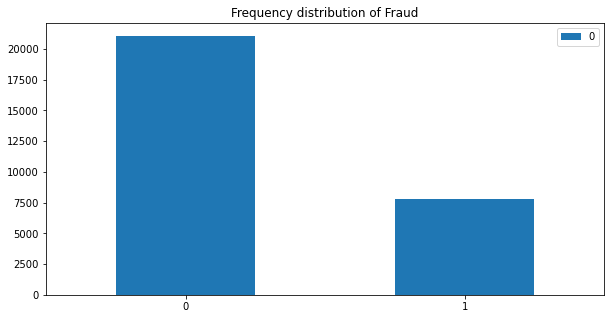

In [264]:
ReportedFraud.plot.bar(figsize=(10,5),rot=0, title="Frequency distribution of Fraud")
plot.show(block=True)

# Policy_CombinedSingleLimit

In [265]:
Policy_CombinedSingleLimit=Cat['Policy_CombinedSingleLimit']   
Policy_CombinedSingleLimit=pd.DataFrame(Policy_CombinedSingleLimit)

In [266]:
Policy_CombinedSingleLimit=pd.get_dummies(Policy_CombinedSingleLimit)
Cat.drop(['Policy_CombinedSingleLimit'],axis=1,inplace=True)
Cat=pd.concat([Cat,Policy_CombinedSingleLimit], axis="columns",join="inner")

In [267]:
Policy_CombinedSingleLimit_=Cat_['Policy_CombinedSingleLimit']   
Policy_CombinedSingleLimit_=pd.DataFrame(Policy_CombinedSingleLimit_)

In [268]:
Policy_CombinedSingleLimit_=pd.get_dummies(Policy_CombinedSingleLimit_)
Cat_.drop(['Policy_CombinedSingleLimit'],axis=1,inplace=True)
Cat_=pd.concat([Cat_,Policy_CombinedSingleLimit_], axis="columns",join="inner")

# Numerical columns

In [269]:
Num=Train_data.select_dtypes(include=['int64'])
Num_=Test_data.select_dtypes(include=['int64'])

In [270]:
AmountOfTotalClaim=Cat['AmountOfTotalClaim_']
Num=pd.concat([Num,AmountOfTotalClaim], axis="columns",join="inner")
AmountOfTotalClaim_=Cat_['AmountOfTotalClaim_']
Num_=pd.concat([Num_,AmountOfTotalClaim_], axis="columns",join="inner")

Text(0.5, 1.0, 'Correlation coefficiency of All features ')

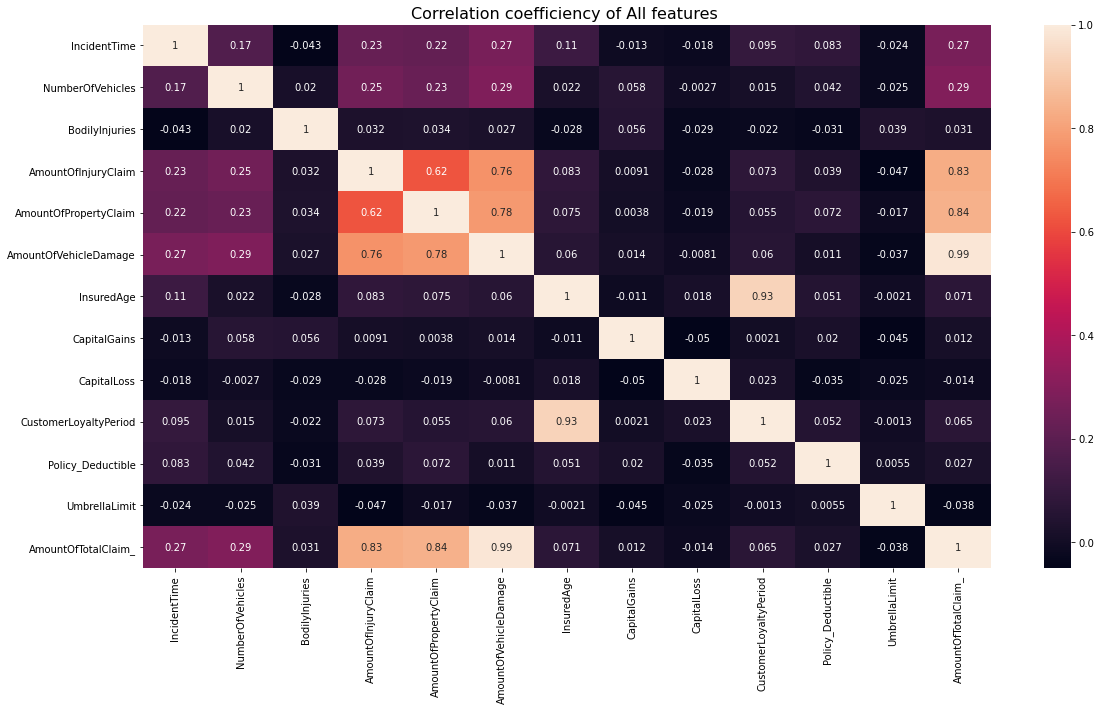

In [271]:
f,ax=plot.subplots(1,1,figsize=(19,10))
sns.heatmap(Num.corr(),annot=True)
ax.set_title('Correlation coefficiency of All features ',fontsize=16)

In [272]:
Num.drop(['AmountOfTotalClaim_','AmountOfPropertyClaim','AmountOfInjuryClaim','InsuredAge'],axis=1,inplace=True)
Num_.drop(['AmountOfTotalClaim_','AmountOfPropertyClaim','AmountOfInjuryClaim','InsuredAge'],axis=1,inplace=True) 

# VIF

In [273]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = Num[['IncidentTime','NumberOfVehicles','BodilyInjuries','AmountOfVehicleDamage','CapitalGains','CapitalLoss','Policy_Deductible','UmbrellaLimit']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                 feature       VIF
0           IncidentTime  4.631534
1       NumberOfVehicles  4.575360
2         BodilyInjuries  2.346542
3  AmountOfVehicleDamage  5.552233
4           CapitalGains  1.669403
5            CapitalLoss  1.748814
6      Policy_Deductible  4.019787
7          UmbrellaLimit  1.231336


In [274]:
Num=pd.concat([Num,Cat], axis="columns",join="inner")
Num

,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfVehicleDamage,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible,UmbrellaLimit,PolicyAnnualPremium,...,ReportedFraud,Policy_CombinedSingleLimit_100/1000,Policy_CombinedSingleLimit_100/300,Policy_CombinedSingleLimit_100/500,Policy_CombinedSingleLimit_250/1000,Policy_CombinedSingleLimit_250/300,Policy_CombinedSingleLimit_250/500,Policy_CombinedSingleLimit_500/1000,Policy_CombinedSingleLimit_500/300,Policy_CombinedSingleLimit_500/500
0,17,3,1,46013,56700,-48500,49,1000,0,1632.73,...,0,0,1,0,0,0,0,0,0,0
1,10,3,2,39903,70600,-48500,114,1000,0,1255.19,...,0,0,1,0,0,0,0,0,0,0
2,22,1,2,43495,66400,-63700,167,617,0,1373.38,...,0,0,0,0,0,0,0,1,0,0
3,22,1,2,42237,47900,-73400,190,722,0,1337.60,...,0,0,0,0,0,0,0,1,0,0
4,10,1,2,37481,0,-41500,115,500,4279863,1353.73,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,3,1,0,4642,0,0,321,655,0,1276.01,...,0,0,0,0,0,0,0,1,0,0
28832,17,1,0,51973,0,-28800,237,1089,0,1273.38,...,0,0,1,0,0,0,0,0,0,0
28833,1,1,2,41219,63100,-43800,392,787,3448735,1380.92,...,0,0,0,0,0,0,1,0,0,0
28834,1,1,2,41712,67400,-43800,391,780,3364301,1389.29,...,0,0,0,0,0,0,1,0,0,0


In [275]:
from sklearn.utils import resample
Num_Y=Num['ReportedFraud']
Num_X=Num.drop(['ReportedFraud'],axis=1)

In [276]:
a_train, a_test, b_train, b_test = train_test_split(Num_X, Num_Y, test_size=0.25, random_state=27)

In [277]:
a = pd.concat([a_train, b_train], axis=1)
not_fraud = a[a['ReportedFraud']==0]
fraud = a[a['ReportedFraud']==1]

In [278]:
fraud_upsampled = resample(fraud,
                          replace=True,
                          n_samples=len(not_fraud),
                          random_state=27) 

In [279]:
upsampled = pd.concat([not_fraud, fraud_upsampled])
upsampled.ReportedFraud.value_counts()

0    15793
1    15793
Name: ReportedFraud, dtype: int64

In [280]:
Y_train_ = upsampled.ReportedFraud
X_train_ = upsampled.drop('ReportedFraud', axis=1)

In [281]:
Y_train = upsampled.ReportedFraud
X_train = upsampled.drop('ReportedFraud', axis=1)

In [282]:
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train_, Y_train_, test_size=0.33, random_state=42)

In [283]:
>>> from sklearn.ensemble import RandomForestClassifier
>>> from sklearn.datasets import make_classification
>>> clf = RandomForestClassifier(random_state=0)
>>> clf.fit(X_train_, y_train_)
>>> X_test_=clf.predict(X_test_)
X_test_

array([1, 0, 0, ..., 0, 0, 0])

In [284]:
y_test_

27091    1
13242    0
17257    0
19165    1
3417     0
        ..
26998    1
1619     0
12055    0
244      0
19726    0
Name: ReportedFraud, Length: 10424, dtype: int32

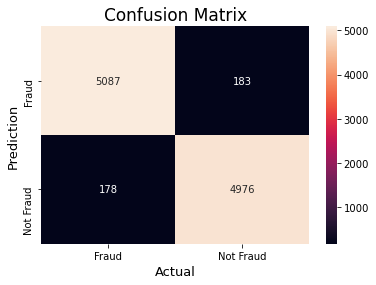

In [285]:
#Import the necessary libraries
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#compute the confusion matrix.
cm = confusion_matrix(y_test_,X_test_)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Fraud','Not Fraud'],
            yticklabels=['Fraud','Not Fraud'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [287]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test_,X_test_)
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5270
           1       0.96      0.97      0.96      5154

    accuracy                           0.97     10424
   macro avg       0.97      0.97      0.97     10424
weighted avg       0.97      0.97      0.97     10424



In [288]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31586 entries, 28109 to 4994
Columns: 114 entries, IncidentTime to Policy_CombinedSingleLimit_500/500
dtypes: float64(2), int64(9), uint8(103)
memory usage: 6.0 MB


In [289]:
Num_=pd.concat([Num_,Cat_], axis="columns",join="inner")

In [290]:
Num_=pd.concat([cust_,Num_], axis="columns",join="inner")

In [291]:
As_format=pd.read_csv(r"C:\Users\91831\Desktop\CapStone_NISCHAL.B.S_4938_Solution\Problem Statement\Sample_Submission.csv")

In [292]:
Res = pd.merge(As_format, Num_, on="CustomerID")

In [293]:
Res=Res.drop(['CustomerID'],axis=1)
Res=Res.drop(['ReportedFraud'],axis=1)
Res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8912 entries, 0 to 8911
Columns: 114 entries, IncidentTime to Policy_CombinedSingleLimit_500/500
dtypes: float64(2), int64(9), uint8(103)
memory usage: 1.7 MB


In [294]:
from sklearn.ensemble import RandomForestClassifier
y_imp = Y_train
X_imp  = X_train
rf_model=RandomForestClassifier(bootstrap=True,  max_features = 'sqrt', n_estimators= 30)
rf_model.fit(X_imp,y_imp)

RandomForestClassifier(n_estimators=30)

In [295]:
impotance=rf_model.feature_importances_
impotance=pd.DataFrame(impotance)

In [296]:
fetch=X_imp.columns
fetch=pd.DataFrame(fetch)
df_index_ = pd.merge(fetch, impotance, right_index=True, left_index=True)
df_index_

,0_x,0_y
0,IncidentTime,0.042681
1,NumberOfVehicles,0.012132
2,BodilyInjuries,0.020244
3,AmountOfVehicleDamage,0.058279
4,CapitalGains,0.030574
...,...,...
109,Policy_CombinedSingleLimit_250/300,0.002589
110,Policy_CombinedSingleLimit_250/500,0.009664
111,Policy_CombinedSingleLimit_500/1000,0.007796
112,Policy_CombinedSingleLimit_500/300,0.001695


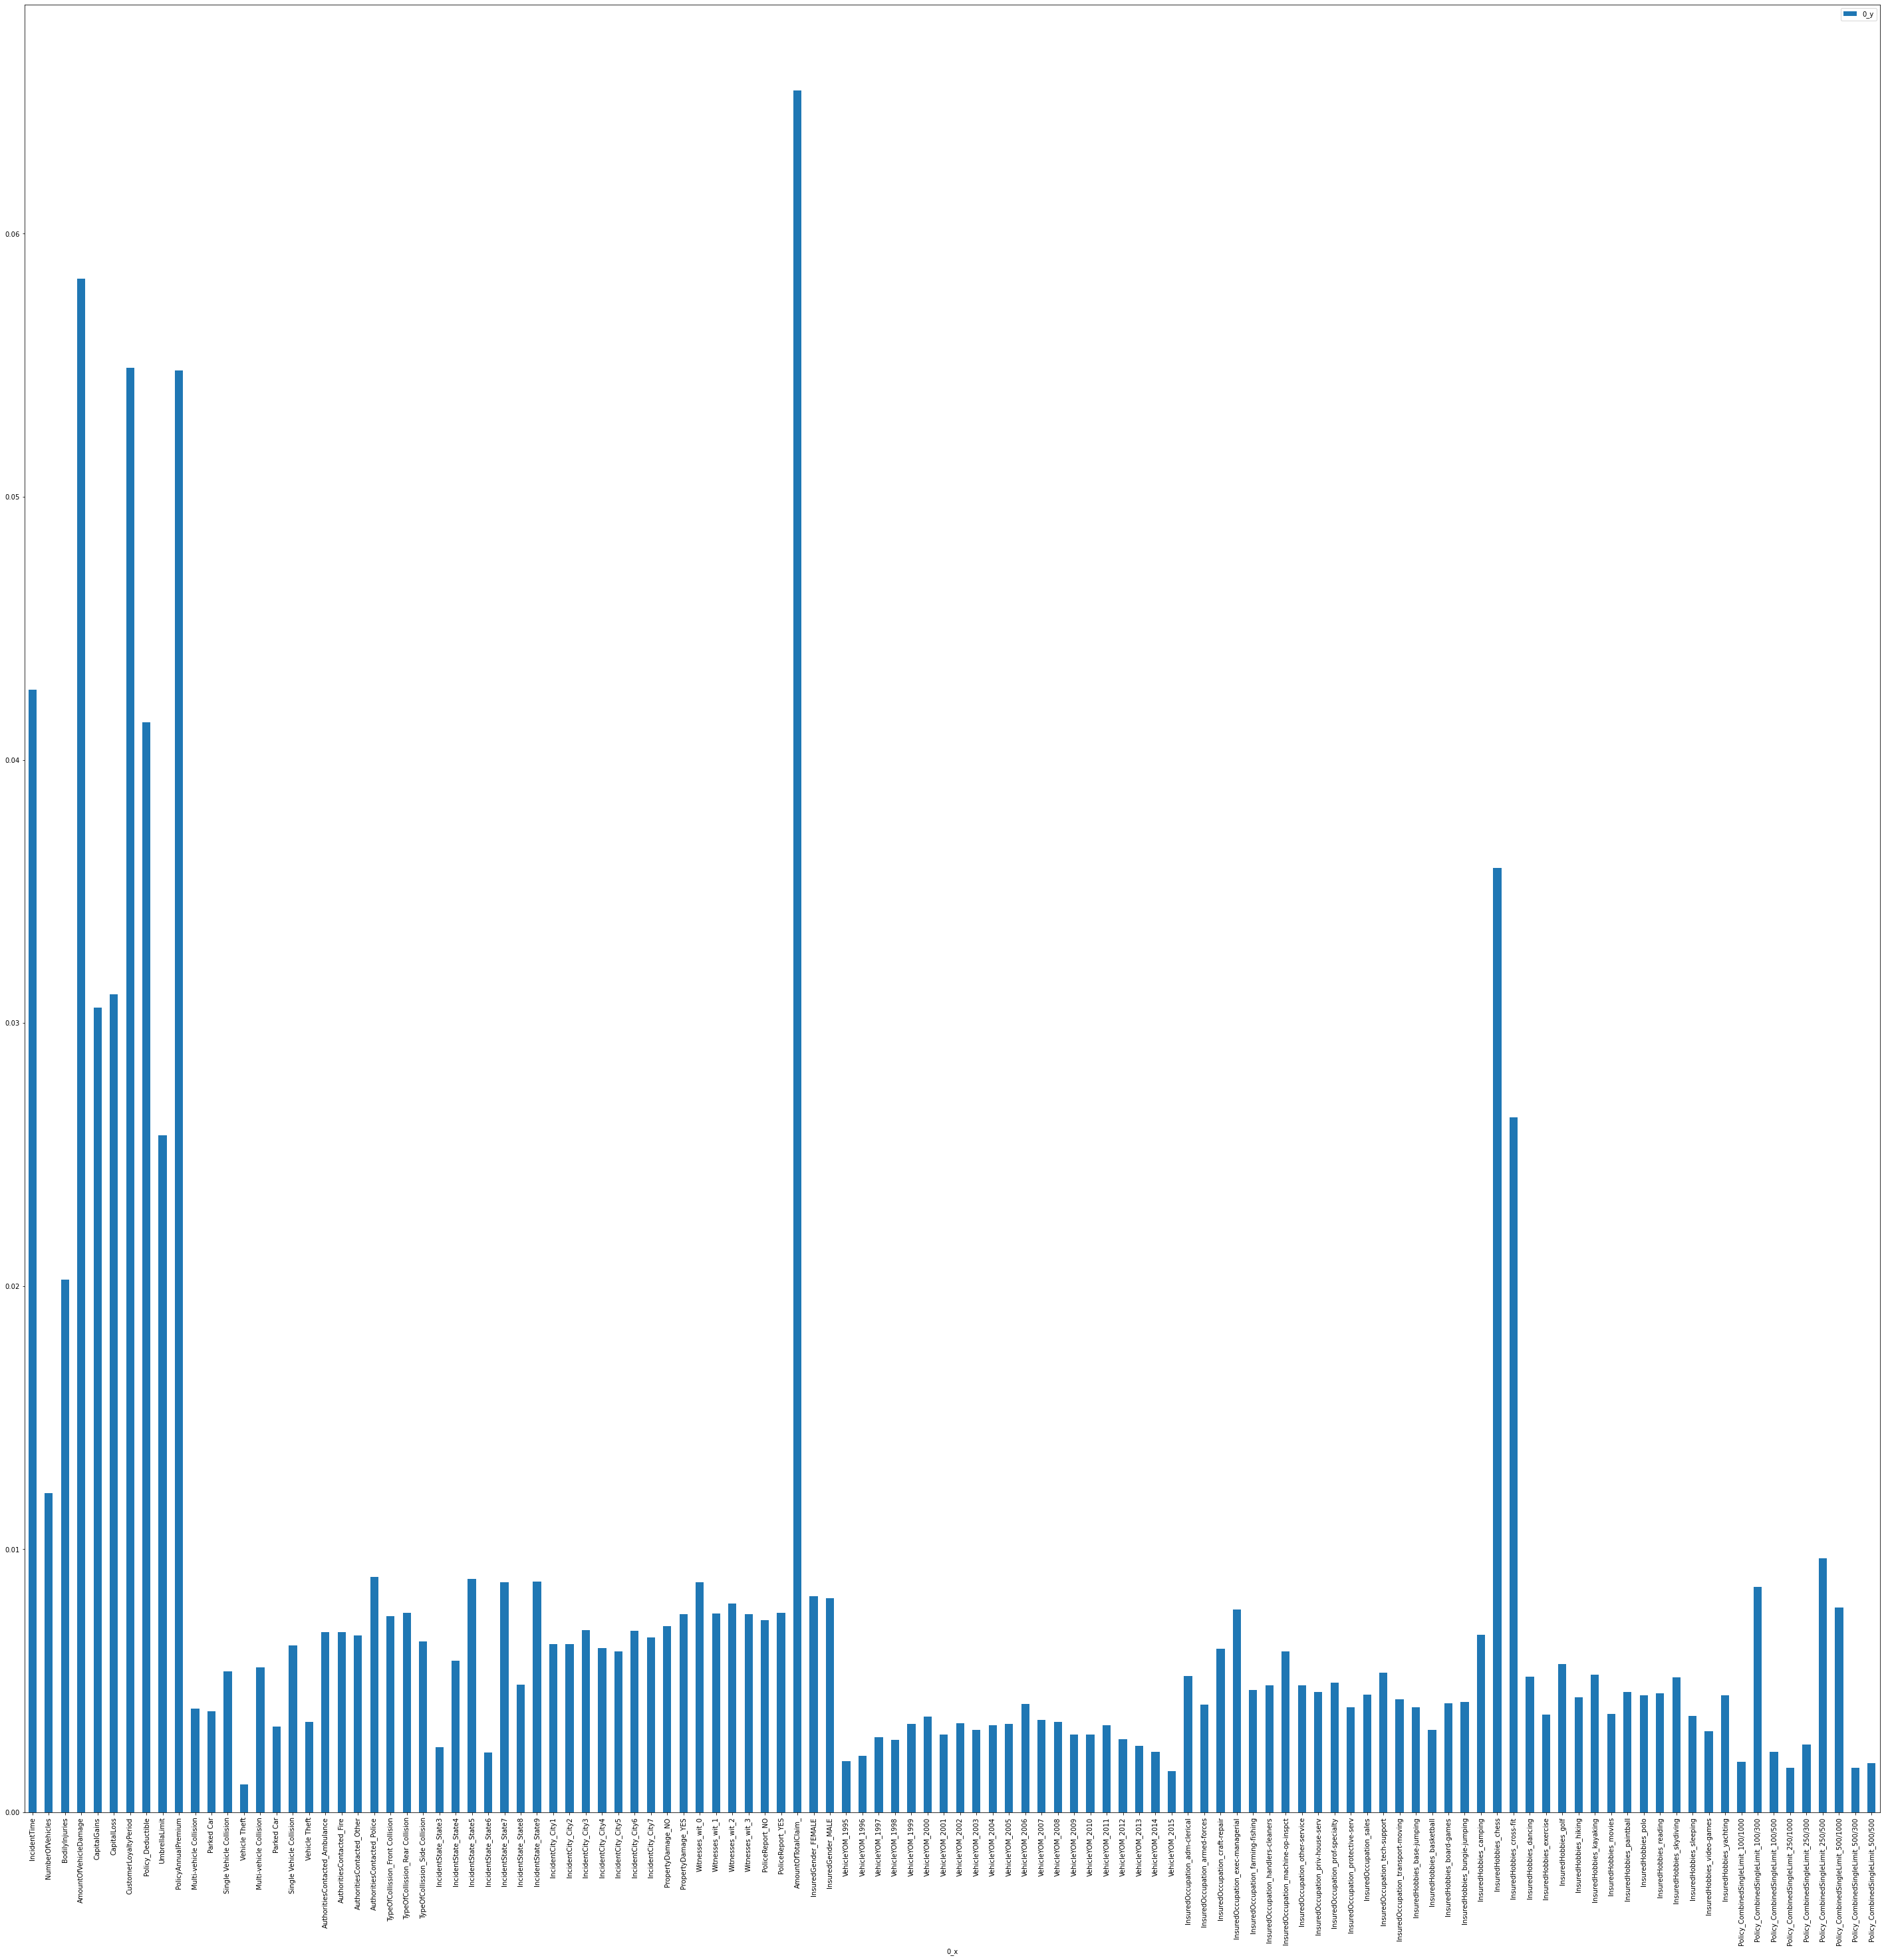

In [297]:
df_index_.plot.bar(x='0_x', y='0_y',figsize=(50,50))
plot.savefig("my_plot.png")

In [298]:
mask = df_index_['0_y'] > 0.008
df_new = pd.DataFrame(df_index_[mask])
df_new

,0_x,0_y
0,IncidentTime,0.042681
1,NumberOfVehicles,0.012132
2,BodilyInjuries,0.020244
3,AmountOfVehicleDamage,0.058279
4,CapitalGains,0.030574
5,CapitalLoss,0.031101
6,CustomerLoyaltyPeriod,0.054906
7,Policy_Deductible,0.041435
8,UmbrellaLimit,0.025722
9,PolicyAnnualPremium,0.054798


# Hyper Parameter Tuning

In [299]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = X_train,Y_train
# define models and parameters
model = RandomForestClassifier()
n_estimators = [5, 10,20]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.970810 using {'max_features': 'sqrt', 'n_estimators': 20}
0.945398 (0.004108) with: {'max_features': 'sqrt', 'n_estimators': 5}
0.964520 (0.003913) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.970810 (0.003418) with: {'max_features': 'sqrt', 'n_estimators': 20}
0.941345 (0.004553) with: {'max_features': 'log2', 'n_estimators': 5}
0.963666 (0.003292) with: {'max_features': 'log2', 'n_estimators': 10}
0.970040 (0.003464) with: {'max_features': 'log2', 'n_estimators': 20}


In [300]:
>>> X, y = X_train,Y_train
>>> clf = RandomForestClassifier(max_features= 'log2', n_estimators= 40, random_state=1)
>>> clf.fit(X, y)
>>> sub=clf.predict(Res)

In [301]:
sub=pd.DataFrame(sub)
As_format=As_format['CustomerID']
sub=pd.concat([As_format,sub], axis="columns",join="inner")

In [302]:
sub.rename(columns ={0: 'ReportedFraud'}, inplace = True)

In [303]:
sub

,CustomerID,ReportedFraud
0,Cust10008,0
1,Cust10010,0
2,Cust10015,0
3,Cust10020,0
4,Cust1003,0
...,...,...
8907,Cust37942,0
8908,Cust20528,0
8909,Cust36797,0
8910,Cust28499,0


In [304]:
sub.to_csv("Result.csv", index = False)